In [0]:
!pip install -q keras

# Part 1 Data Preprocessing

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import Dataset

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ANN/Churn_Modelling.csv')
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,-1]

Create dummy variables

In [0]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

 concatnate the dataframes

In [0]:
X = pd.concat([X,geography,gender],axis=1)

In [0]:
X = X.drop(['Geography','Gender'],axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [0]:
#Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Part2 Lets build a ANN model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [0]:
#Initialising the ANN
Classifier = Sequential()

In [0]:
#Adding the input layer and the first hidden neuron
Classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [0]:
#Adding second hidden layer
Classifier.add(Dense(units = 6,kernel_initializer= 'he_uniform', activation='relu'))

In [0]:
#Adding output layer
Classifier.add(Dense(kernel_initializer='glorot_uniform', activation = 'sigmoid',units=1))

In [29]:
Classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compiling the ANN
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
#Fitting the ANN model to our train data
model_history = Classifier.fit(X_train,Y_train,validation_split=0.3,batch_size=10,epochs=100)


Train on 5600 samples, validate on 2400 samples
Epoch 1/100
5600/5600 [==============================] - 4s 689us/step - loss: 0.6177 - accuracy: 0.7682 - val_loss: 0.5292 - val_accuracy: 0.7958
Epoch 2/100
5600/5600 [==============================] - 2s 350us/step - loss: 0.4947 - accuracy: 0.7961 - val_loss: 0.4779 - val_accuracy: 0.7958
Epoch 3/100
5600/5600 [==============================] - 2s 339us/step - loss: 0.4609 - accuracy: 0.7961 - val_loss: 0.4603 - val_accuracy: 0.7958
Epoch 4/100
5600/5600 [==============================] - 2s 336us/step - loss: 0.4455 - accuracy: 0.7961 - val_loss: 0.4500 - val_accuracy: 0.7958
Epoch 5/100
5600/5600 [==============================] - 2s 347us/step - loss: 0.4349 - accuracy: 0.7961 - val_loss: 0.4412 - val_accuracy: 0.7958
Epoch 6/100
5600/5600 [==============================] - 2s 341us/step - loss: 0.4258 - accuracy: 0.7961 - val_loss: 0.4337 - val_accuracy: 0.7958
Epoch 7/100
5600/5600 [==============================] - 2s 345us/step

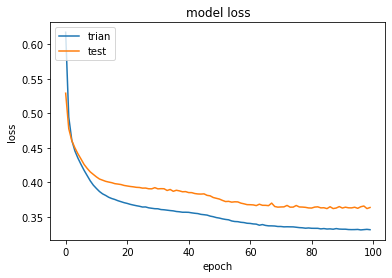

In [32]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['trian','test'],loc='upper left')
plt.show()

## Part3 Making predictions and evaluating the model

In [0]:
y_pred = Classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,Y_test)


In [0]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,Y_test)

In [38]:
print(score)

0.862
